In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import math

In [2]:
class PID :
    pGain = 0
    iGain = 0
    dGain = 0
    target = 0
    err = 0
    output = 0
    dataIn = 0
    integSum = 0
    derPast = 0
    time = 0
        
    pOut = 0
    iOut = 0
    dOut = 0
        
    def __init__(self, pGain, iGain, dGain) :
        self.pGain = pGain
        self.iGain = iGain
        self.dGain = dGain
        
    def Control(self, inputData):
        self.Proportion(inputData)
        self.Integral(inputData)
        self.Derive(inputData)
        
        return self.pOut + self.iOut + self.dOut

    def Proportion(self, inputData):
        self.dataIn = inputData
        self.err = self.target - inputData
        self.pOut = self.err * self.pGain
        
    def Integral(self, inputData):
        self.integSum = (self.integSum + self.err) * self.iGain
        
        self.iOut = self.integSum
        
    def Derive(self, inputData):
        if inputData != 0 :
            der = (inputData - self.derPast) / self.time
            self.derPast = inputData
            self.dOut = der * self.dGain
    
    def calcError(self, inputData) :
        return inputData
    
    def Print(self) :
        print("P: {} I: {} D: {}".format(self.pOut, self.iOut, self.dOut))

In [3]:
class PID_2 :
    pGain = 0
    iGain = 0
    dGain = 0
    
    pOut = 0
    iOut = 0
    dOut = 0
    
    r = 0
    e = 0
    u = 0
    y = 0
    
    time = 1
    
    # PID Internal variables
    iSum = 0
    der = 0
    
    def __init__(self, pGain, iGain, dGain) :
        self.pGain = pGain
        self.iGain = iGain
        self.dGain = dGain
    
    def Control(self, target) :
        self.r = target
        self.ControlLoop()
    
    def ControlLoop(self) :
        self.Error()
        self.Proportion()
        self.Integral()
        self.Derivative()
        self.Sum()
    
    def Error(self) :
        self.e = self.r - self.y
    
    def Proportion(self) :
        self.pOut = self.e * self.pGain
        
    def Integral(self) :
        self.iSum = (self.iSum + self.e) * self.time
        self.iOut = (self.iOut + self.iSum) * self.iGain
    
    def Derivative(self) :
        self.der = (self.e * self.time) / self.time
        self.dOut = self.der * self.dGain
    
    def Sum(self) :
        self.u = self.pOut + self.iOut + self.dOut

In [4]:
def targetTest_1(inputData) :
    return math.radians(math.sin(math.pow(inputData, 0.1))) * inputData * 1

def targetTest_2(x) :
    return math.radians(math.sin(math.pow(x, 0.4)))

def plantFeedback_1(inputData) :
    if inputData > 0 :
        return 2
    elif inputData < 0 :
        return 2
    else :
        return 0
    
def plantFeedback(inputData) :
    if inputData > 0 :
        return inputData + inputData * 0.1
    elif inputData < 0 :
        return inputData + inputData * -0.1
    else :
        return 0
    
def plant(command) :
    return command

In [5]:
simTime = 100
basicTarget = 50

basicPID = PID_2(0.1, 0.001, 0.1)
dynamicPID = PID_2(0.2, 0.001, 0.1)

basicPID.time = 1

targetData = []
errorData = []
resultData = []

def runDynamicTest(time, pid, targetFunc) :
    for t in range(time) :
        target = targetFunc(t)
        pid.Control(target)
        pid.y = pid.y + pid.u
        targetData.append(target)
        errorData.append(pid.e)
        resultData.append(pid.y)

def runStaticTest(time, pid, target) :
    for t in range(time) :
        pid.Control(target)
        pid.y = pid.y + pid.u
        targetData.append(target)
        errorData.append(pid.e)
        resultData.append(pid.y)
        
        #printOutput()

#runStaticTest(simTime, basicPID, basicTarget)
runDynamicTest(simTime, dynamicPID, targetTest_2)

def printOutput() :
    for t in range(len(targetData)) :
        print(f"Target: {targetData[t]}\t Result: {resultData[t]}")


In [6]:
def setAxes(axis):
    axis.set_title("PID Control")
    axis.set_xlabel("Time")
    axis.set_ylabel("Value")
    axis.legend()

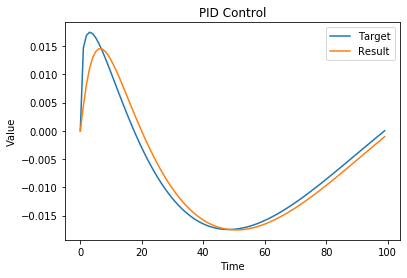

In [7]:
figure_PID, axis_PID = plt.subplots()
axis_PID.plot(targetData, label="Target")
#axis_PID.plot(errorData, label="Error")
axis_PID.plot(resultData, label="Result")

setAxes(axis_PID)

In [406]:
targetApo = 100000
apoGain = 0.00001

def SpeedCurve(x) :
    return math.radians(math.sin(x) + math.pow(x, 2))

def createCurve(start, end, curve) :
    output = []
    for t in range(start, end) :
        output.append(t * math.sin(math.pow(curve, 0.1)))
    return output

def recip(apo) :
    if apo != 0 :
        #return math.degrees(math.sin((math.pow(apo, 0.1))) * -1) + 1
        #return math.degrees(math.tan((apo - targetApo) * apoGain + 1)) * math.pi / 180 - 0.6
        # GOOD:
        return (math.pow(apo, 1.8) - targetApo) * apoGain * 0.0001
        #return (math.sin(math.pow(apo, 0.1)) - targetApo) * apoGain
    else :
        return 0

def createData(length) :
    output = []
    for t in range(length) :
        output.append(recip(t))
        #output.append(SpeedCurve(t))
    return output

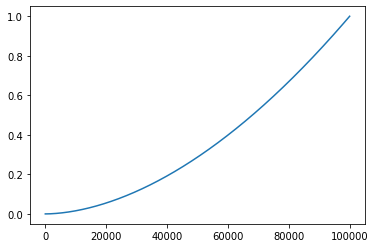

In [407]:
figure_speed, axis_speed = plt.subplots()
axis_speed.plot(createData(100000))